In [5]:
#TO DOs
#Date formatting in charts
# maybe add chart with fx.close, fx.close times slippage for v3, curve v2 twoPool, curve v2 three Pool


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#fx = pd.read_csv('CHFEUR=short.csv')
fx = pd.read_csv('CHFEUR=X.csv')
fx['Date'] = pd.to_datetime(fx['Date'])

#sx = pd.read_csv('CHFSGD=short.csv')
#sx['Date'] = pd.to_datetime(fx['Date'])

#fx.Close[0]

Text(0, 0.5, 'Slippage')

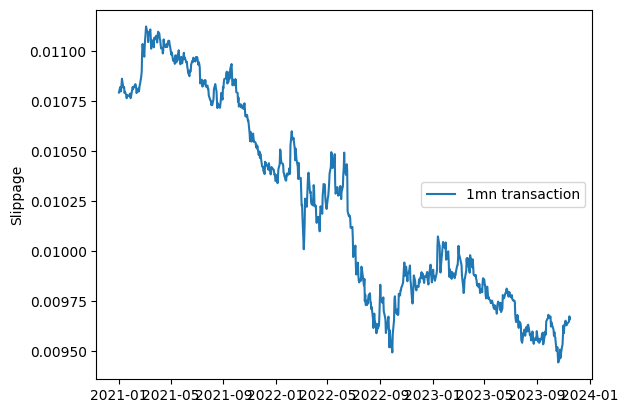

In [6]:
#Uniswap v2

def slippage_uniswap_v2(S_t, S_0, delta_y, N_0):
    """
    Calculating slippage for buying delta_y token Y with spot price S_t, intital exchange rate S_0 and reserves of token X of N_0
    for Uniswap v2
    """
    slippage = delta_y/(N_0*(S_t*S_t)**0.5)
    #slippage = delta_y/(N_0*(S_t*S_0)**0.5)
    #print(slippage)
    return (slippage)

S_0 = fx.Close[0]
N_0 = 100_000_000 #reserve pool of CHF 
delta_y1 = 1_000_000 # a trader buy this amount of EUR
delta_y2 = 5_000_000


slippage_vector=slippage_uniswap_v2(S_t=fx.Close.to_numpy(),S_0=S_0,delta_y=delta_y1,N_0=N_0)
slippage_vector_delta_small=slippage_uniswap_v2(S_t=fx.Close.to_numpy(),S_0=S_0,delta_y=delta_y2,N_0=N_0)

plt.plot(fx.Date, slippage_vector, label="1mn transaction")
#plt.plot(fx.Date, slippage_vector_delta_small, label="5mn transaction")
plt.legend(loc="center right")
plt.ylabel("Slippage")


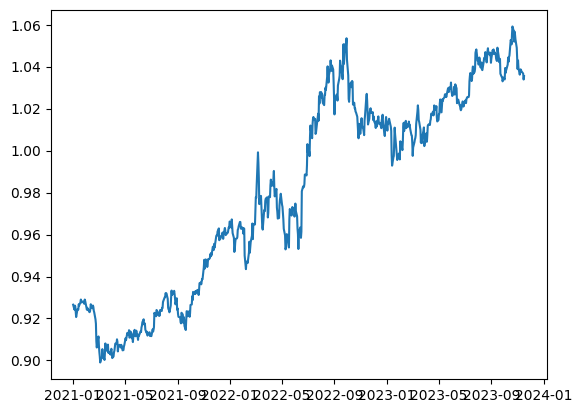

In [7]:
plt.plot(fx.Date, fx.Close)

Text(0, 0.5, 'Slippage')

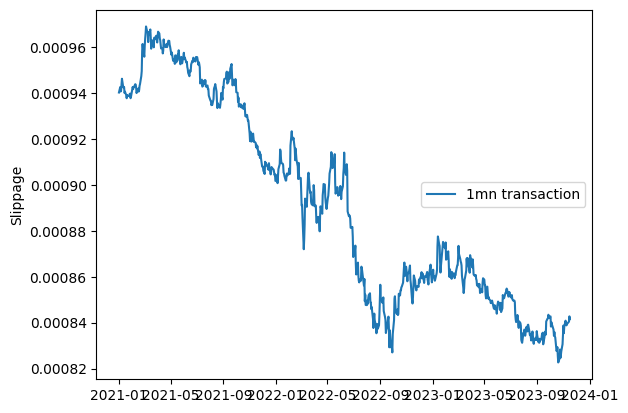

In [11]:
#Uniswap v3

def slippage_uniswap_v3(S_t, S_0, delta_y, N_0, alpha):
    """
    Calculating slippage for buying delta_y token Y with spot price S_t, intital exchange rate S_0 and reserves of token X of N_0
    for Uniswap v3, with a liquidity position (S_t a, S_t * a)
    """
    return (slippage_uniswap_v2(S_t, S_0, delta_y, N_0,) * (1 - 1/(alpha**0.5)))

alpha = 1.2
S_0 = fx.Close[0]
N_0 = 100_000_000 #reserve pool of CHF 
delta_y1 = 1_000_000 # a trader buy this amount of EUR
delta_y2 = 5_000_000


v_slippage_x1=slippage_uniswap_v3(S_t=fx.Close.to_numpy(),S_0=S_0,delta_y=delta_y1,N_0=N_0, alpha=alpha)
#v_slippage_x2=slippage_uniswap_v3(S_t=fx.Close.to_numpy(),S_0=S_0,delta_y=delta_y2,N_0=N_0, alpha=alpha)

plt.plot(fx.Date, v_slippage_x1, label="1mn transaction")
#plt.plot(fx.Date, v_slippage_x2, label="5mn transaction")
plt.legend(loc="center right")
plt.ylabel("Slippage")
